<a href="https://colab.research.google.com/github/ROYXP/Bone-fracture-classifier-with-computer-vision/blob/main/Bone_Fracture_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer vision model for identifying multi-region bone fracture

* Data can be found on kagggle at: https://www.kaggle.com/datasets/bmadushanirodrigo/fracture-multi-region-x-ray-data?select=Bone_Fracture_Binary_Classification

## Objective:

This dataset comprises fractured and non-fractured X-ray images covering all anatomical body regions, including lower limb, upper limb, lumbar, hips, knees, etc. The dataset is categorized into train, test, and validation folders, each containing fractured and non-fractured radiographic images. The objective is to use deep learning in helping health professionals detect accurately bone fractures in X-ray generated images.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Loading in data from local machine storage
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Unzip the data

import zipfile
import os
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Bone.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
# Inspecting the data
!ls /content/train

 fractured  'not fractured'


### Visualizing the data

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (We'll view images from here)
  target_folder = target_dir+target_class

  # Get a random path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Shows the shape of the image
  return img

['90-rotated3-rotated2-rotated1 - Copy.jpg']
Image shape: (224, 224, 3)
['65-rotated3-rotated1-rotated3.jpg']
Image shape: (224, 224, 3)


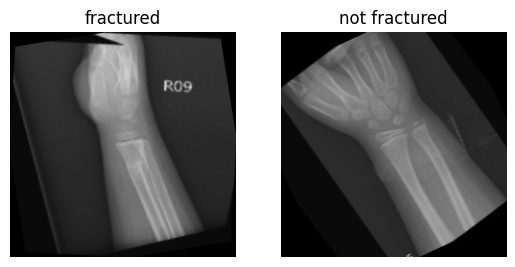

In [8]:
# Visualizing the image
plt.figure()
plt.subplot(1, 2, 1)
fractured_image = view_random_image("/content/train/", "fractured")
plt.subplot(1, 2, 2)
not_fractured_image = view_random_image("/content/train/", "not fractured")

## Preprocessing

In [9]:
# Preprocessing the data

train_dir = "/content/train/"
val_dir = "/content/val/"
test_dir = "/content/test/"

In [10]:
# Turn data into batches & rescale
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [11]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary")

val_data = val_datagen.flow_from_directory(directory=val_dir,
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode="binary")

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224, 224),
                                             class_mode="binary")

Found 9246 images belonging to 2 classes.
Found 829 images belonging to 2 classes.
Found 506 images belonging to 2 classes.


In [12]:
# checking number of batches in train data
len(train_data)

289

In [13]:
# Get a sample of a train data batch
images, labels = train_data.next() # Get the next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [14]:
# Checking the shape of training data
images[1].shape

(224, 224, 3)

## Creating a baseline model with Convolutional Neural Network (CNN)

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Activation, Conv2D, MaxPool2D
from tensorflow.keras import Sequential
import tensorflow as tf


In [19]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           padding="valid",
                           activation="relu",
                           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [20]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 216, 216, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 466560)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 466561    
                                                                 
Total params: 469571 (1.79 MB)
Trainable params: 46957

In [22]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [23]:
# Fitting the model
model_1_history = model_1.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=val_data,
                              validation_steps=len(val_data))

Epoch 1/5
289/289 [==============================] - ETA: 0s - loss: 0.1265 - accuracy: 0.9587

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


289/289 [==============================] - 156s 541ms/step - loss: 0.1265 - accuracy: 0.9587 - val_loss: 0.1445 - val_accuracy: 0.9590
Epoch 2/5
289/289 [==============================] - 156s 538ms/step - loss: 0.0194 - accuracy: 0.9943 - val_loss: 0.1154 - val_accuracy: 0.9783
Epoch 3/5
289/289 [==============================] - 155s 535ms/step - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.1549 - val_accuracy: 0.9771
Epoch 4/5
289/289 [==============================] - 155s 536ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.1693 - val_accuracy: 0.9807
Epoch 5/5
289/289 [==============================] - 155s 537ms/step - loss: 0.0142 - accuracy: 0.9949 - val_loss: 0.1984 - val_accuracy: 0.9759


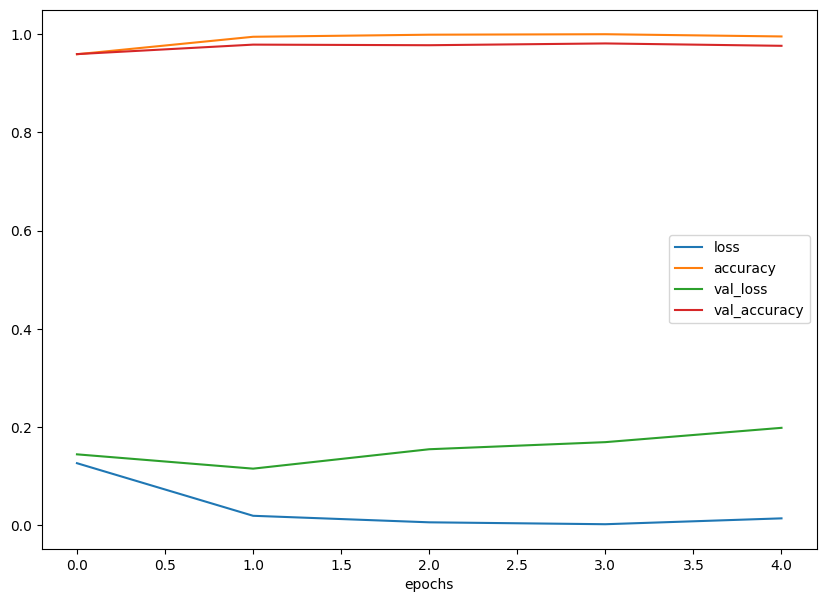

In [25]:
# Plotting loss curves
pd.DataFrame(model_1_history.history).plot(figsize=(10,7))
plt.xlabel("epochs");

In [26]:
#Evaluating on the test data
model_1.evaluate(test_data)

16/16 [==============================] - 4s 263ms/step - loss: 0.0299 - accuracy: 0.9881


[0.02990245446562767, 0.9881423115730286]

### Our model has successfully achieved 97% accuracy on the validation data and 98% accuracy on the test data
with an accuracy_score of 99% over 5 epochs.
This shows:
* The model is not overfitting
* It generalizes well
* It has achieved satisfactory result

In [31]:
# Saving the model

model_1.save("bone_fracture_classifier")

In [33]:
# Loading in checking saved model
loaded_bone_model = tf.keras.models.load_model("bone_fracture_classifier")
loaded_bone_model.evaluate(test_data)

16/16 [==============================] - 4s 224ms/step - loss: 0.0299 - accuracy: 0.9881


[0.029902450740337372, 0.9881423115730286]